In [ ]:
import yfinance as yf

In [ ]:
# Get the historical data for Bitcoin
df_1d = yf.download('BTC-USD', period='1y', interval='1d')
df_1h = yf.download('BTC-USD', period='1y', interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_1d

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,29481.013672,29572.791016,28929.609375,29340.261719,29340.261719,17544464887
2023-04-29,29336.566406,29452.455078,29088.042969,29248.488281,29248.488281,10662634333
2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641,29268.806641,14652199272
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527
...,...,...,...,...,...,...
2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,30276655120
2024-04-25,64275.019531,65275.207031,62783.632812,64481.707031,64481.707031,32155786816
2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950


In [ ]:
df_1h

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-28 17:00:00+00:00,29289.625000,29295.732422,29172.853516,29234.244141,29234.244141,0
2023-04-28 18:00:00+00:00,29250.027344,29262.642578,29141.419922,29256.867188,29256.867188,0
2023-04-28 19:00:00+00:00,29251.107422,29426.626953,29251.107422,29358.878906,29358.878906,0
2023-04-28 20:00:00+00:00,29344.337891,29391.970703,29323.199219,29353.037109,29353.037109,0
2023-04-28 21:00:00+00:00,29356.134766,29384.306641,29327.873047,29347.677734,29347.677734,0
...,...,...,...,...,...,...
2024-04-28 13:00:00+00:00,63569.082031,63795.371094,63513.535156,63748.214844,63748.214844,27596800
2024-04-28 14:00:00+00:00,63745.738281,63745.738281,63490.269531,63578.683594,63578.683594,0
2024-04-28 15:00:00+00:00,63577.890625,63612.484375,63471.332031,63521.218750,63521.218750,3188736


In [ ]:
import numpy as np

# Calculate Bollinger Bands
close_id = df_1d['Close']
SMA_id = close_id.rolling(window=20).mean()
std_id = close_id.rolling(window=20).std()
upper_band_id = SMA_id + 2 * std_id
lower_band_id = SMA_id - 2 * std_id

# Generate trading signals
df_1d_length = len(df_1d)
signals_id = np.zeros(df_1d_length, dtype=int)
# Assuming df_1d is a NumPy array or Pandas Series
signal_hold_id = np.zeros(df_1d_length, dtype=int)

for i in range(df_1d_length):
    if close_id[i] > upper_band_id[i]:
        signals_id[i] = -1  # Sell signal
        signal_hold_id[i] = 0
    elif close_id[i] < lower_band_id[i]:
        signals_id[i] = 1  # Buy signal
        signal_hold_id[i] = 1
    else:
        if signal_hold_id[i-1] > 0: # Hold signal
          signal_hold_id[i] = 1
        # else :


In [ ]:
# Backtest the strategy with fixed buy amount
amount_to_buy = 0.05  # Fixed amount to buy on buy signal
account_value = 10000  # Initial account value
holdings = 0  # Initial number of shares held
trading_count = 0
account_money = np.full(df_1d_length, account_value)
max_earn = 0
max_loss = 0
for i in range(df_1d_length):
    if signals_id[i] == -1:  # Sell signal
        if holdings > 0:
          holdings = 0
          sell_get = amount_to_buy * df_1d['Close'][i]
          account_value += sell_get
          account_money[i] = account_money[i-1] + sell_get
          trading_count += 1
          temp_profit = sell_get - buy_cost
          if temp_profit > 0:
            if temp_profit > max_earn:
              max_earn = temp_profit
          else:
            if temp_profit < max_loss:
              max_loss = temp_profit
        else:
          account_money[i] = account_money[i-1]

    elif signals_id[i] == 1:  # Buy signal
        # Buy amount_to_buy worth of asset (assuming fractional shares allowed)
        if holdings == 0:
          buy_cost = amount_to_buy * df_1d['Close'][i]
          if account_value >= buy_cost:
            holdings = 1
            account_value -= buy_cost
            account_money[i] -= buy_cost
        else:
          account_money[i] = account_money[i-1]
    else:
        account_money[i] = account_money[i-1]



# Calculate final account value
if holdings > 0:
  final_account_value = account_value + amount_to_buy * df_1d['Close'][-1]
  account_money[-1] += amount_to_buy * df_1d['Close'][-1]
  trading_count += 1
print('account_value:', account_value, 'last:', amount_to_buy * df_1d['Close'][-1])
# Print backtest results
print("Initial account value:", 10000)
print("Final account value:", final_account_value)
print("Return:", (final_account_value - 10000) / 10000)
print("Number of trading :", trading_count)
print('Max earn:',max_earn)
print('Max loss:',max_loss)
print("")
print("B&H profit:", (close_id[-1]-close_id[0])*0.05)
print("B&H ROI:", close_id[-1]/close_id[0])

account_value: 6839.00595703125 last: 3182.8224609375
Initial account value: 10000
Final account value: 10021.82841796875
Return: 0.002182841796875073
Number of trading : 3
Max earn: 128.36953125000014
Max loss: -98.28994140624991

B&H profit: 1715.809375
B&H ROI: 2.1695937762569484


In [ ]:
import matplotlib.pyplot as plt

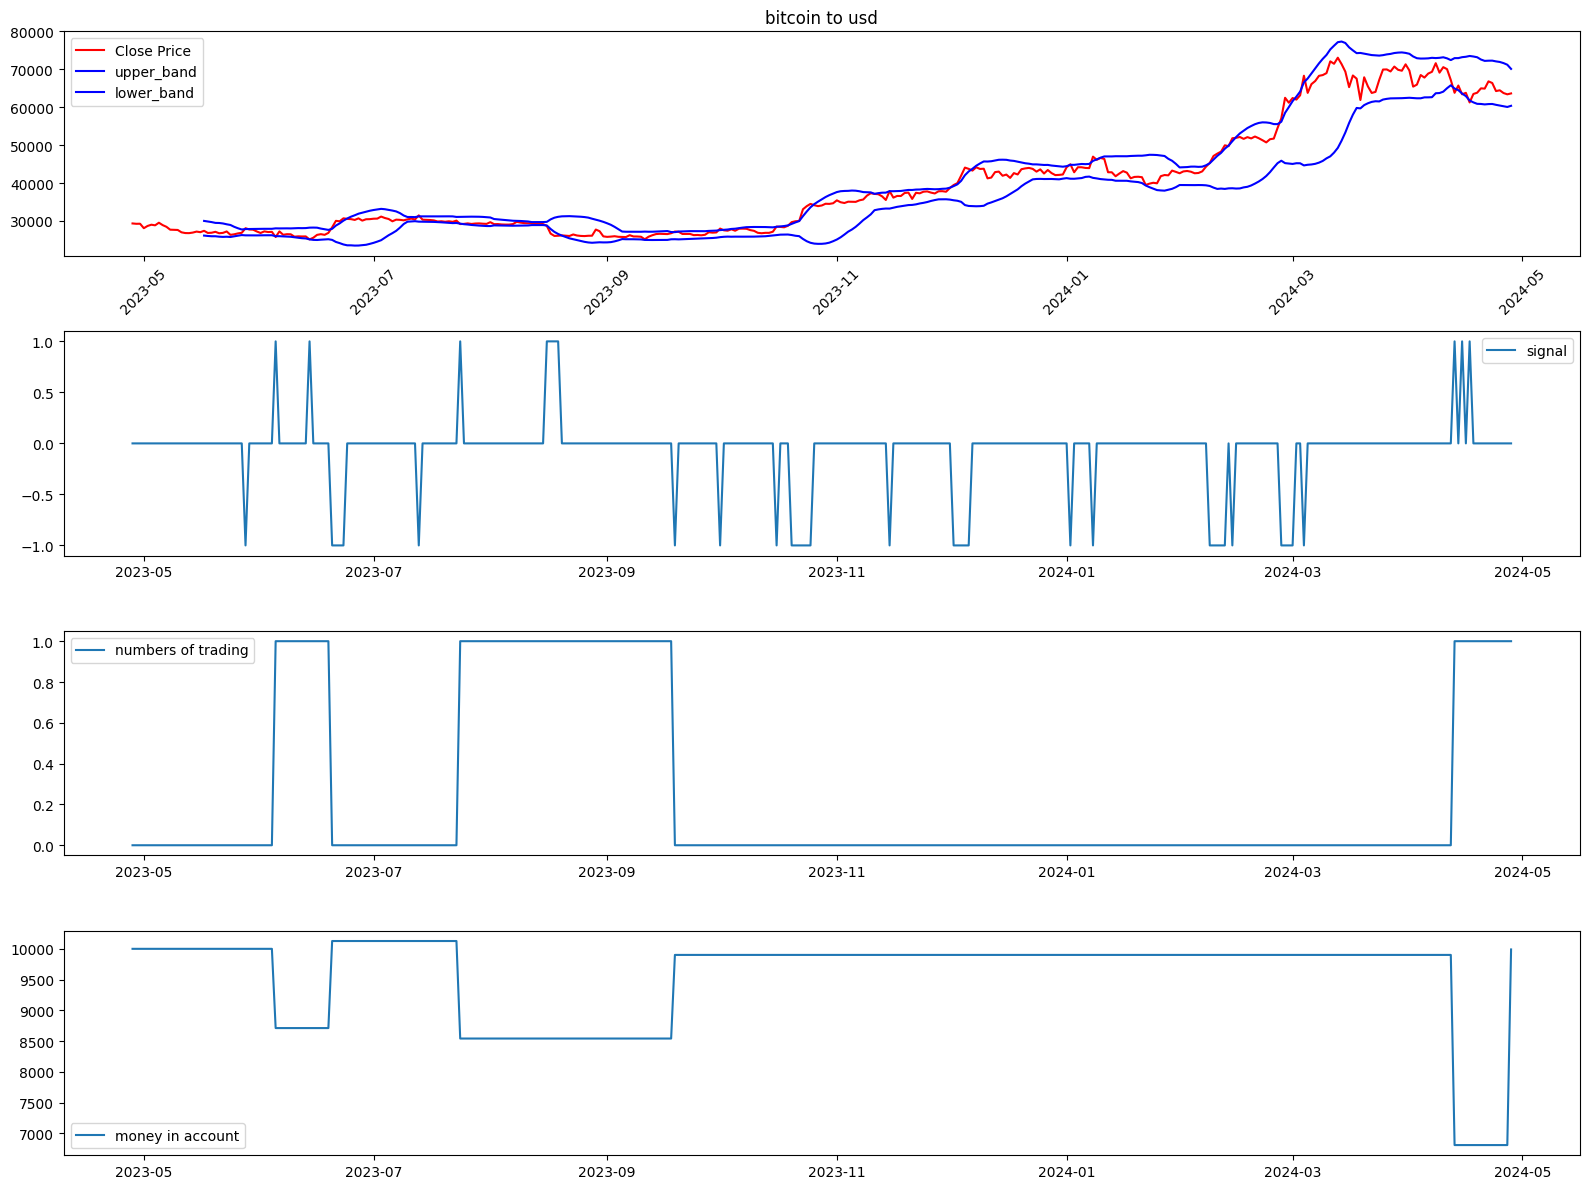

In [ ]:
dates_1d = df_1d.index.to_pydatetime()

plt.figure(figsize=(16, 12))  # Adjust figure size as needed
plt.subplot(4,1,1)
# Plot the close prices
plt.plot(close_id, label='Close Price', color='red')
plt.plot(upper_band_id, label='upper_band', color='blue')
plt.plot(lower_band_id, label='lower_band', color='blue')
plt.title("bitcoin to usd")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.subplot(4,1,2)
plt.plot(dates_1d, signals_id, label='signal')
plt.legend()
plt.subplot(4,1,3)
plt.plot(dates_1d, signal_hold_id, label='numbers of trading')
plt.legend()
plt.subplot(4,1,4)
plt.plot(dates_1d, account_money, label='money in account')
plt.legend()
plt.tight_layout()
# plt.grid(True)
# plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
sma1 = df_1d.Close.rolling(20).mean()
sma2 = df_1d.Close.rolling(60).mean()
# pandas.shift(n), n default is 1.
hold_period = np.zeros(df_1d_length)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
signal_long = signal_long.astype(int)
signal_short = signal_short.astype(int)

hold_short = 0
hold_long = 0
long_count = 0
short_count = 0
total_count = 0
long_pay = 0
long_get = 0
short_pay = 0
short_get = 0
profit = 0
total_profit = np.zeros(df_1d_length)

for i in range(df_1d_length):
  if (signal_long[i]==1):
    if hold_long == 0:
      long_pay = amount_to_buy * close_id[i]
      profit -= long_pay
      total_profit[i] = total_profit[i-1]
      hold_long = 1
      hold_period[i] = 1
  elif (signal_short[i]==1):
    if hold_short == 0:
      short_get = amount_to_buy * close_id[i]
      profit += short_get
      total_profit[i] = total_profit[i-1]
      hold_short = 1
      hold_period[i] = -1
  else:
    hold_period[i] = hold_period[i-1]

  if sma1[i] > close_id[i]:
    if hold_long > 0:
      long_get = amount_to_buy * close_id[i]
      long_earn = long_get - long_pay
      profit += long_get
      total_profit[i] += long_earn
      hold_long = 0
      long_count += 1
      total_count += 1
      hold_period[i] = 0
      print("trade:", total_count)
      print("long profit:", total_profit[i])
  elif sma1[i] < close_id[i]:
    if hold_short > 0:
      short_pay = amount_to_buy * close_id[i]
      short_earn = short_get - short_pay
      profit -= short_pay
      total_profit[i] += short_earn
      hold_short = 0
      short_count += 1
      total_count += 1
      hold_period[i] = 0
      print("trade:", total_count)
      print("short profit:", total_profit[i])

if hold_long > 0:
  long_get = amount_to_buy * close_id[-1]
  profit += long_get
  total_profit[-1] = long_get - long_pay
  total_count += 1
  print("trade:", total_count)
  print("total profit:", total_profit[-1])
  # total_profit[-1] =
if hold_short > 0:
  short_pay = amount_to_buy * close_id[-1]
  profit -= short_pay
  total_profit[-1] = short_get - short_pay
  total_count += 1
  print("trade:", total_count)
  print("total profit:", total_profit[-1])

print("")
print("total profit:", profit)


trade: 1
long profit: -25.846484374999818
trade: 2
short profit: 0.0
trade: 3
long profit: -53.663867187500045
trade: 4
short profit: -62.63261718750027
trade: 5
long profit: 851.0599609374999
trade: 6
total profit: 31.0224609375

total profit: 739.939453125


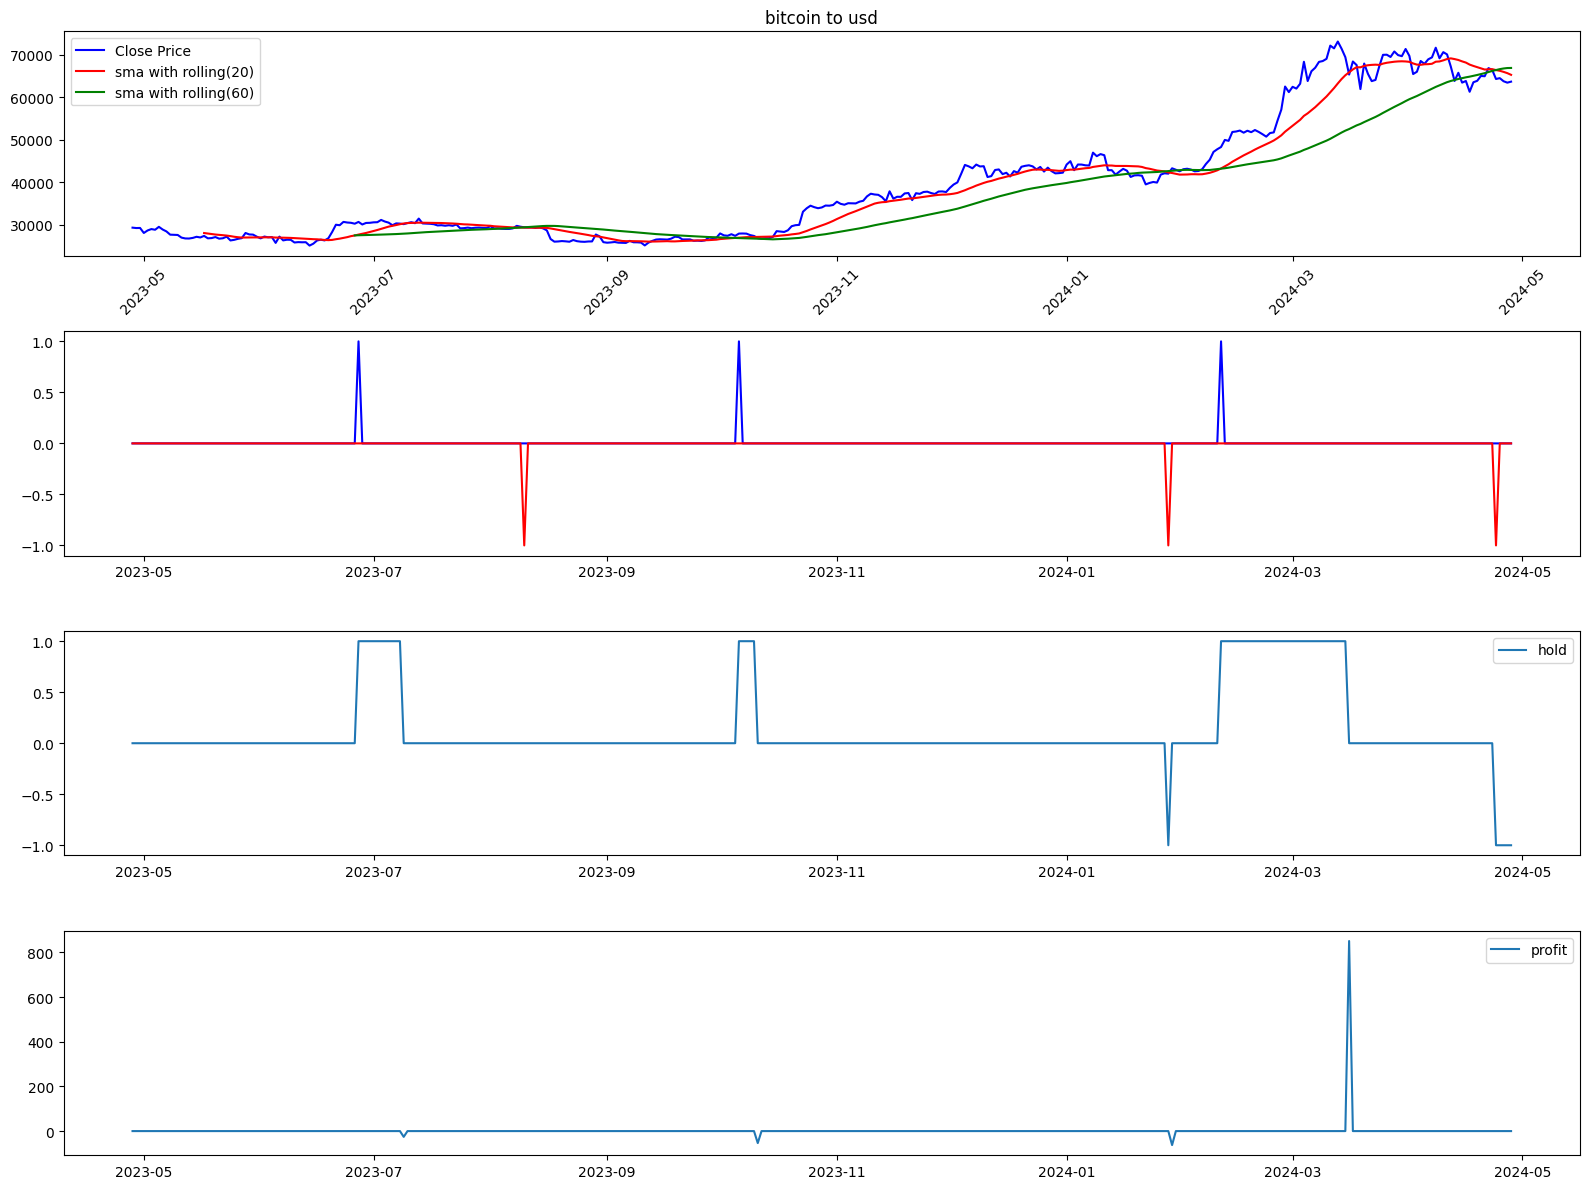

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(4,1,1)
# Plot the close prices
plt.plot(close_id, label='Close Price', color='blue')
plt.plot(sma1, label='sma with rolling(20)', color='red')
plt.plot(sma2, label='sma with rolling(60)', color='green')
plt.title("bitcoin to usd")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.subplot(4,1,2)
plt.plot(dates_1d, signal_long, color='blue')
plt.plot(dates_1d, (-signal_short), color='red')
plt.subplot(4,1,3)
plt.plot(dates_1d, hold_period, label='hold')
plt.legend()
plt.subplot(4,1,4)
plt.plot(dates_1d, total_profit, label='profit')
plt.legend()
plt.tight_layout()
plt.show()